# K-Means
author:

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import copy
import math

In [0]:
# Euclidean distance
def dist(a, b):
    return np.linalg.norm(a - b)

# plot (all in one)
def plot_state(data, centroids, assignments = None):
    if(assignments is not None):
        color_ = [colors[i+15] for i in assignments]
    else:
        color_ = 'b'
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(data['eruptions'], data['waiting'], color=color_)
    for i in centroids.keys():
        plt.scatter(*centroids[i], color='r', marker='*', s= 300)
    plt.show()

def update_assignments():
    assignments = np.ones(len(data), dtype = np.int32)*-1
    for row in range(len(data)):
        min_distance = 1000
        for c in centroids.keys():
            distance = dist(data.values[row], centroids[c])
            if(min_distance > distance):
                min_distance = distance
                assignments[row] = c    
    return assignments

def update_centroids(assignments, centroids):
    for c in centroids.keys():
        centroids[c] =[
            np.mean(data.iloc[np.where(assignments==c)[0],0]), #eruptions axis
            np.mean(data.iloc[np.where(assignments==c)[0],1])] #waiting axis
    return centroids


In [0]:
# setup
colors = list(matplotlib.colors.get_named_colors_mapping().values())

data = pd.read_csv('faithful.dat', sep='\s+',header=0, skiprows = 25)
data = data.sort_values('waiting')
np.random.seed(200)
WSS = {}

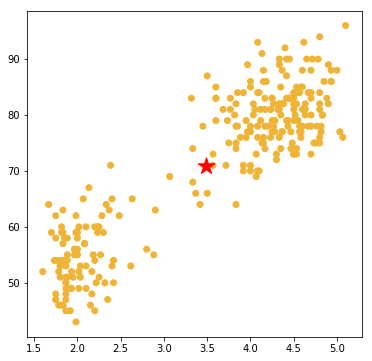

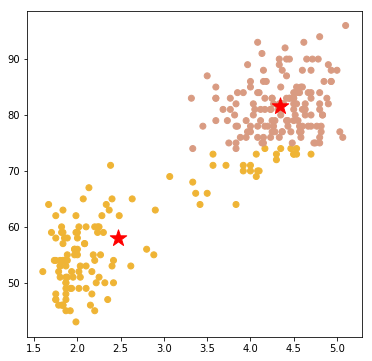

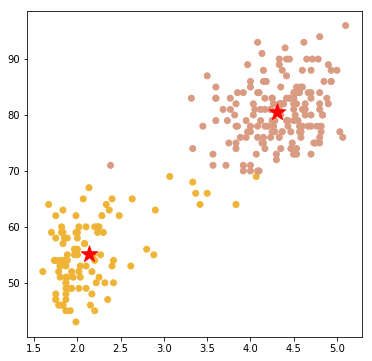

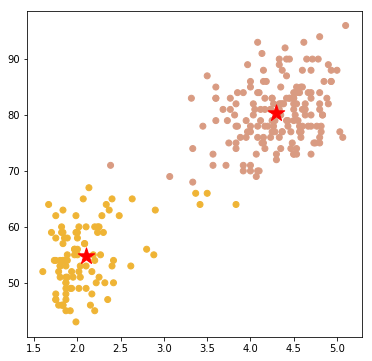

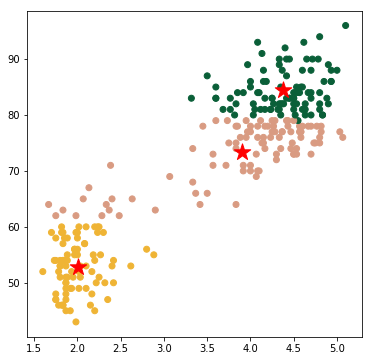

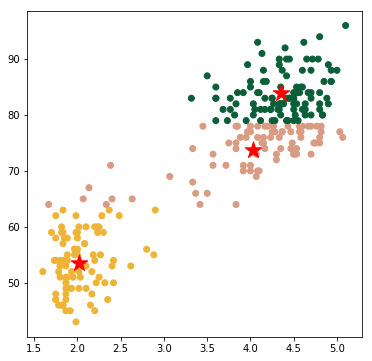

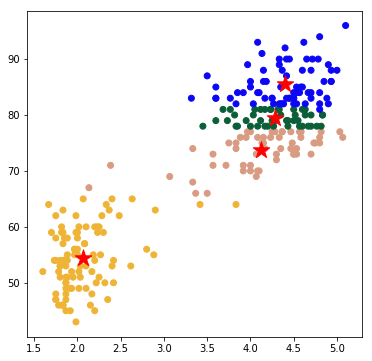

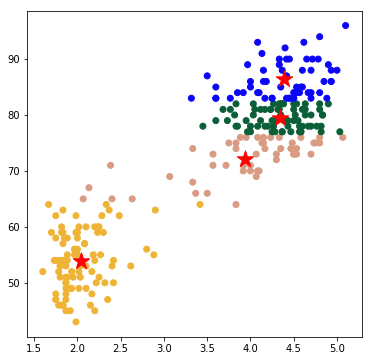

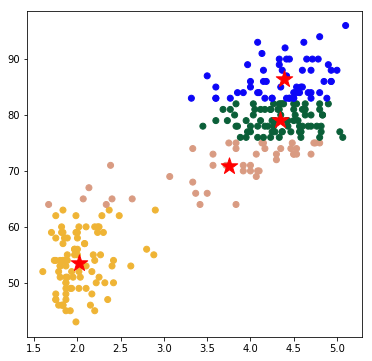

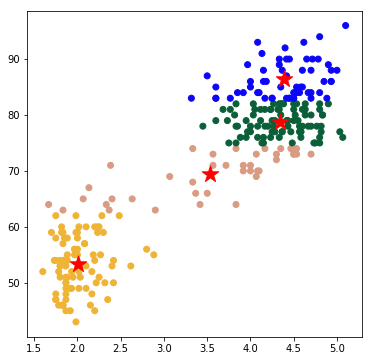

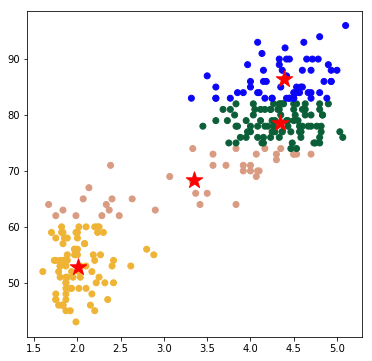

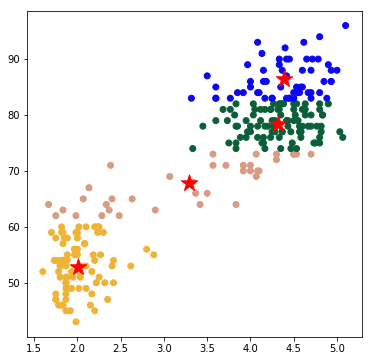

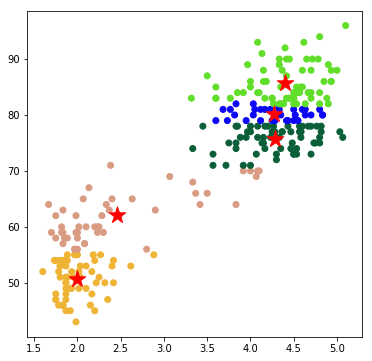

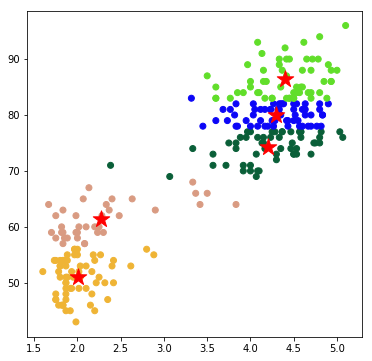

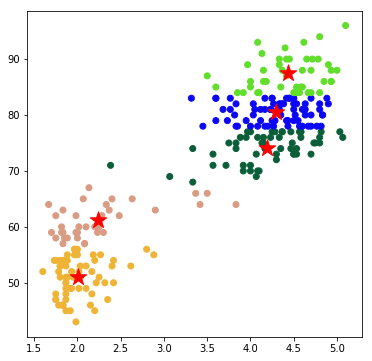

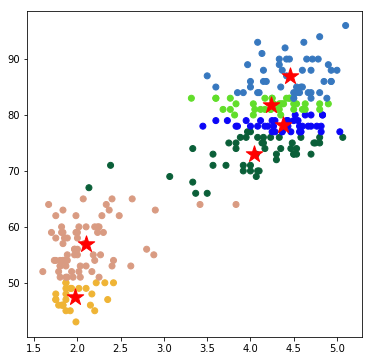

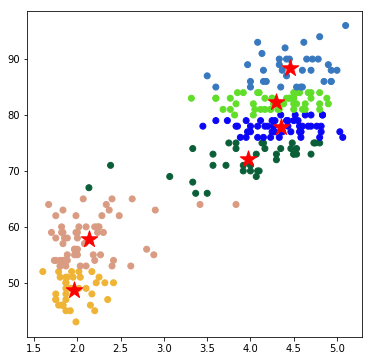

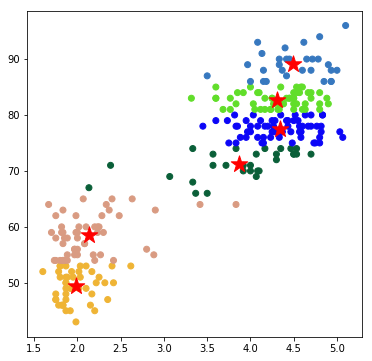

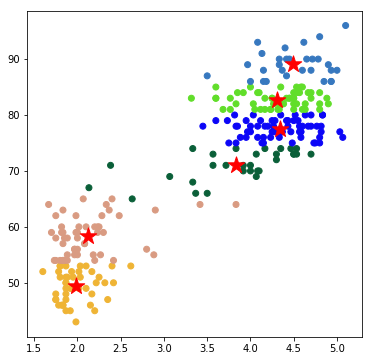

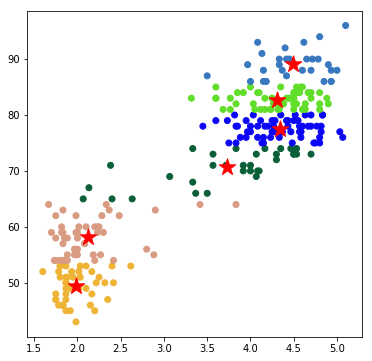

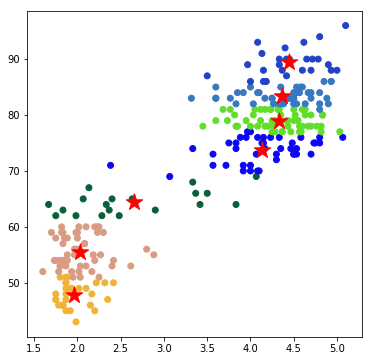

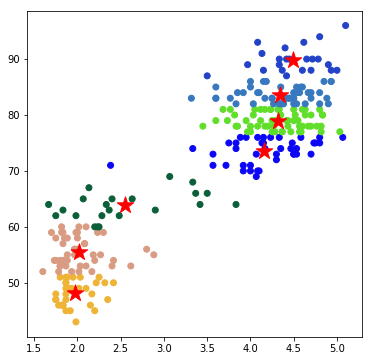

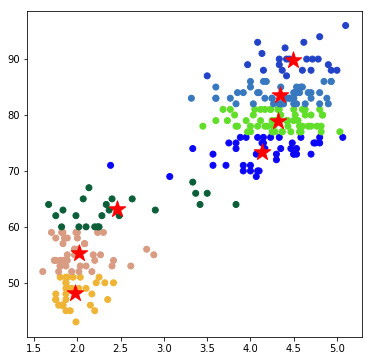

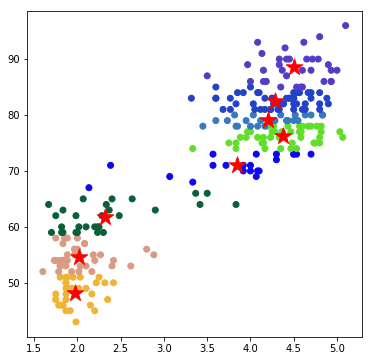

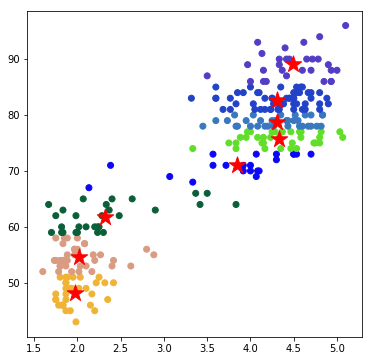

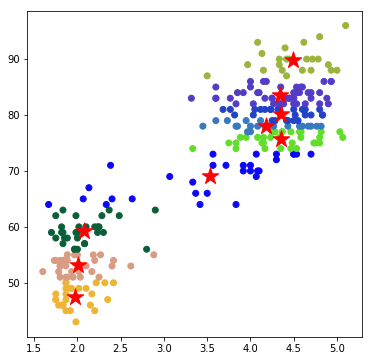

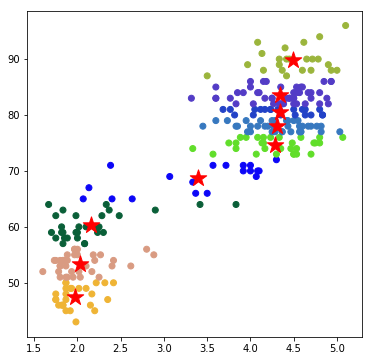

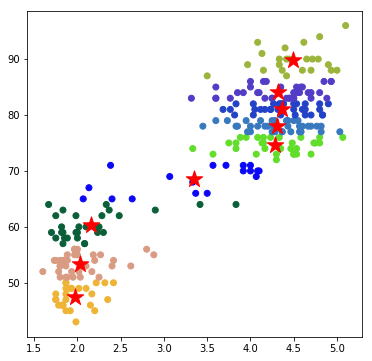

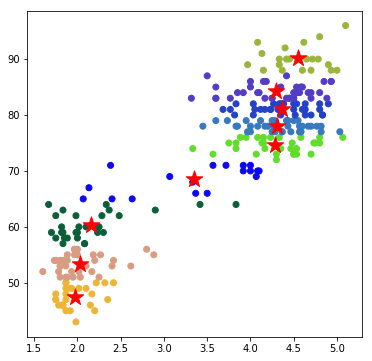

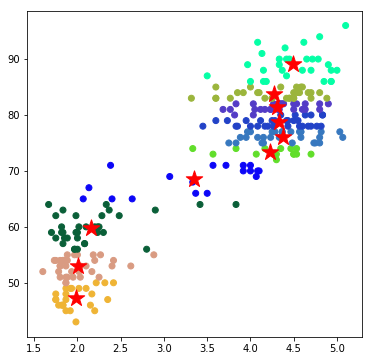

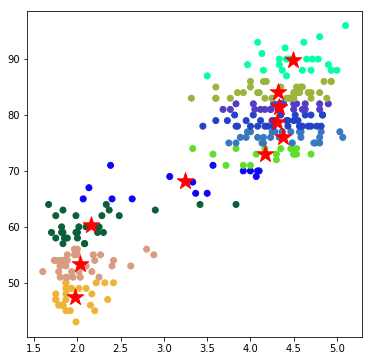

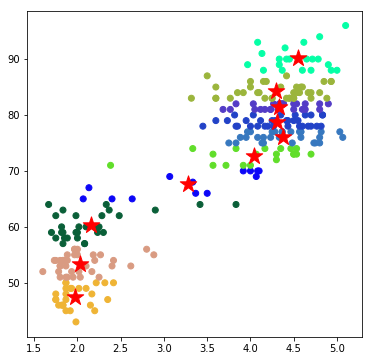

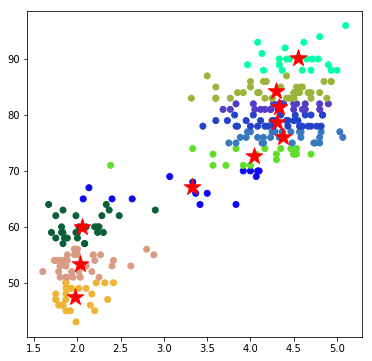

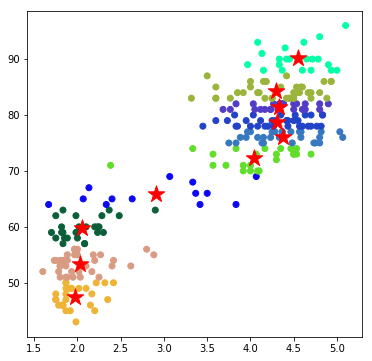

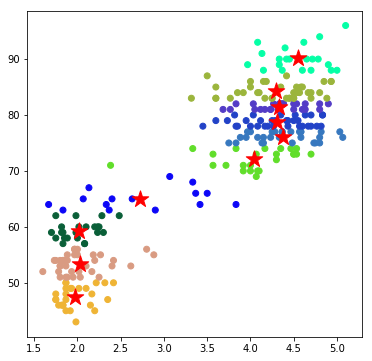

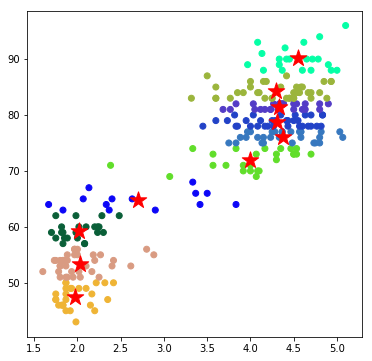

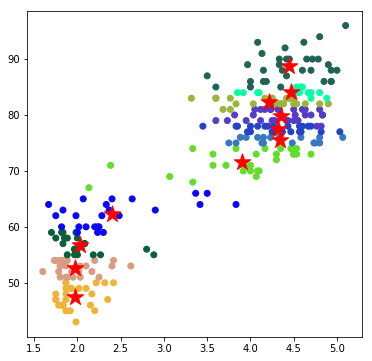

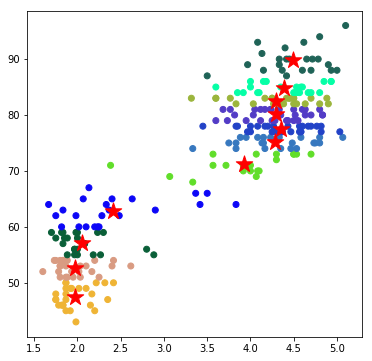

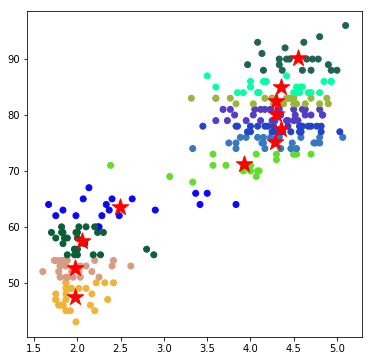

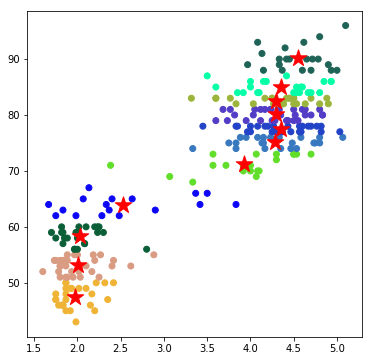

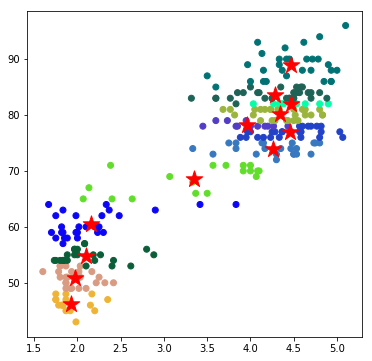

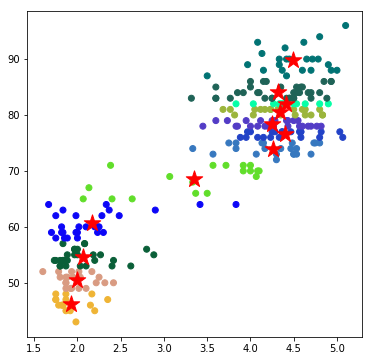

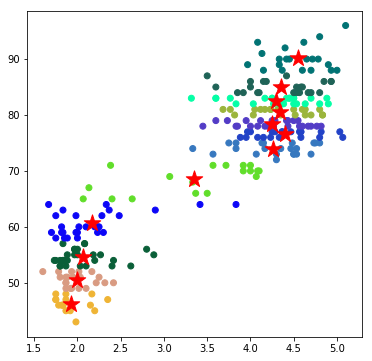

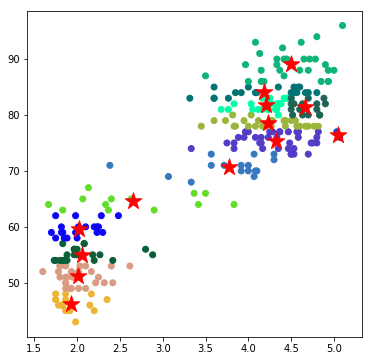

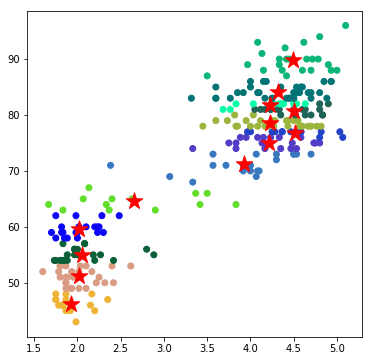

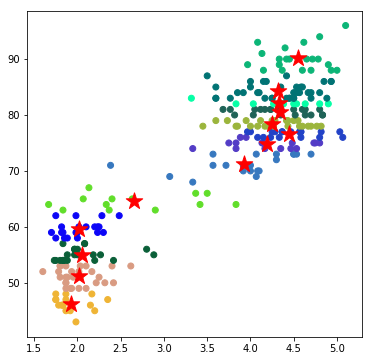

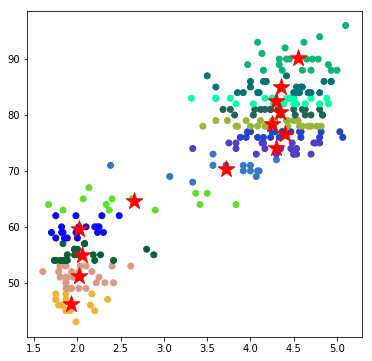

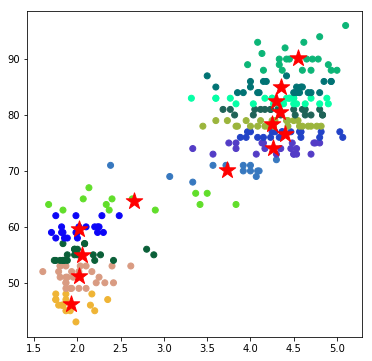

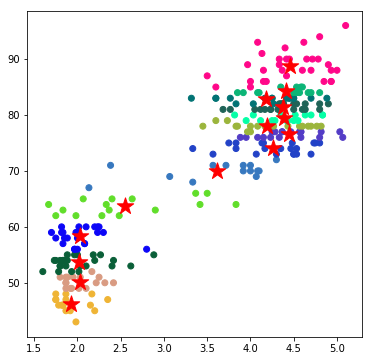

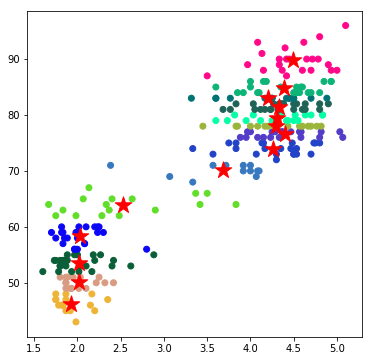

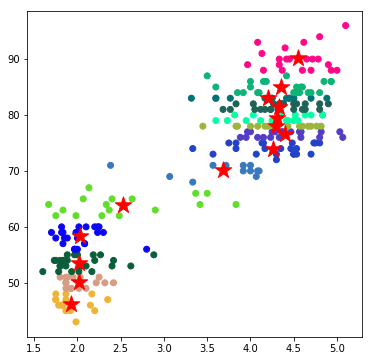

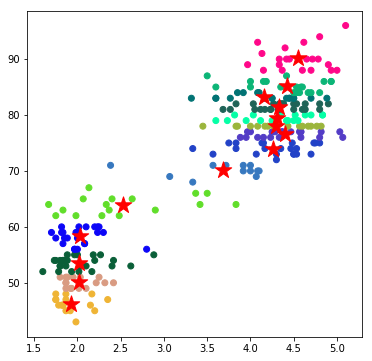

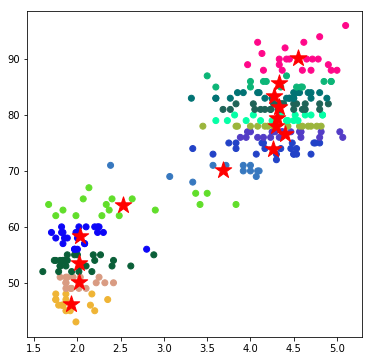

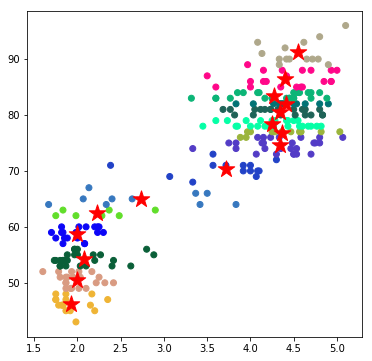

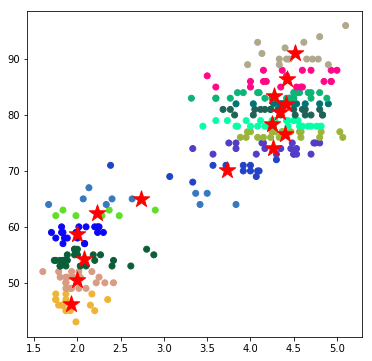

{1: 3268.8074824563237, 2: 1273.6247983558417, 3: 973.8676122534398, 4: 814.09482851863959, 5: 638.79556856338365, 6: 539.57393233303048, 7: 462.99211916213017, 8: 409.51844312892251, 9: 363.82141187690303, 10: 330.90110859416342, 11: 305.69181131309364, 12: 298.01050888432638, 13: 259.04481458981013, 14: 246.01427210785886, 15: 232.75403282743153}


In [0]:
#algorithm

for k in range(1,16):
    # choose k random existing points, but
    # equally distributed along the waiting axis.

    a = math.floor(data.shape[0] / k)
    centroids = {    
        i : data[i*a:(i+1)*(a)].sample(1).values[0] for i in range(k)
    }
    anyChange = True
    assignments = np.ones(len(data), dtype = np.int32)*-1
    while anyChange:
        old_assignments = copy.deepcopy(assignments)
        assignments = update_assignments()
        anyChange = not (assignments == old_assignments).all()
        if(anyChange):
            centroids = update_centroids(assignments, centroids)
            plot_state(data,centroids,assignments)

    WSS[k] = 0
    for c in centroids.keys():
        WSS[k] += np.sum(np.sqrt(np.sum((data.iloc[np.where(assignments==c)[0],]-centroids[c])**2, axis = 1)))
print(WSS)

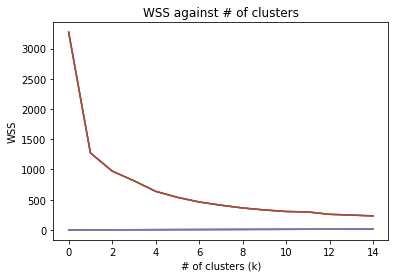

In [0]:
#Final plot
plt.plot(WSS.items())
plt.title("WSS against # of clusters")
plt.xlabel("# of clusters (k)")
plt.ylabel("WSS")
plt.show()